# Información de general del Dataset

## Importación de las librerías

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl


## Importación de datos

In [37]:
# Cargamos los datos
df = pd.read_csv('./BTCUSDT15m18.8.17-31-7-22.csv', index_col=0, parse_dates=True)
df=df.drop(columns=['ignore'])
df=df.drop(columns=['open_time'])
df=df.drop(columns=['close_time'])

In [38]:
df


,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:14:59.999,4285.08,4305.76,4267.78,4305.76,10.458,4.481e+04,58,7.764,3.324e+04
2017-08-18 00:29:59.999,4309.08,4309.92,4285.85,4292.11,15.913,6.836e+04,54,14.125,6.067e+04
2017-08-18 00:44:59.999,4292.11,4309.15,4286.01,4302.15,12.543,5.394e+04,58,12.402,5.333e+04
2017-08-18 00:59:59.999,4282.51,4340.62,4228.76,4286.53,43.521,1.864e+05,98,36.413,1.560e+05
2017-08-18 01:14:59.999,4269.36,4269.36,4200.00,4251.40,18.759,7.940e+04,53,11.892,5.045e+04
...,...,...,...,...,...,...,...,...,...
2022-07-30 23:14:59.999,23699.58,23738.65,23620.00,23642.84,1474.138,3.491e+07,40876,692.227,1.640e+07
2022-07-30 23:29:59.999,23642.84,23644.13,23545.98,23560.66,1425.875,3.365e+07,44321,675.538,1.594e+07
2022-07-30 23:44:59.999,23560.66,23638.69,23551.98,23600.63,1248.204,2.945e+07,36347,605.204,1.428e+07


### Definición del la frequencia

In [126]:
df=df.asfreq('15T')
df=df.fillna(method='ffill')
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
qav                0
num_trades         0
taker_base_vol     0
taker_quote_vol    0
dtype: int64

## Análisis estadístico de los datos


### Revisar los datos: head()

Puede revisar las primeras 20 filas de sus datos utilizando la función `head()` en el DataFrame de Pandas. Puede ver que la primera columna enumera el número de fila, lo cual es útil para hacer referencia a una observación específica.

In [127]:
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-31 00:14:59.999,4555.14,4579.2,4555.14,4578.94,12.027,54871.348,38.0,1.411,6462.302
2017-08-31 00:29:59.999,4555.14,4579.2,4555.14,4578.94,12.027,54871.348,38.0,1.411,6462.302
2017-08-31 00:44:59.999,4555.14,4579.2,4555.14,4578.94,12.027,54871.348,38.0,1.411,6462.302
2017-08-31 00:59:59.999,4555.14,4579.2,4555.14,4578.94,12.027,54871.348,38.0,1.411,6462.302
2017-08-31 01:14:59.999,4555.14,4579.2,4555.14,4578.94,12.027,54871.348,38.0,1.411,6462.302


### Dimensiones de los datos: shape

Puede revisar la forma y el tamaño de su conjunto de datos imprimiendo la propiedad shape en el DataFrame de Pandas. Los resultados se enumeran en filas y luego en columnas.

In [128]:
df.shape

(131425, 9)

### Tipos de atributos: dtypes

Puede enumerar los tipos de datos utilizados por el DataFrame para caracterizar cada atributo utilizando la propiedad `dtypes`.

In [129]:
df.dtypes

open               float64
high               float64
low                float64
close              float64
volume             float64
qav                float64
num_trades         float64
taker_base_vol     float64
taker_quote_vol    float64
dtype: object

### Resumen estadístico: describe()

Puedes ver que obtienes muchos datos. Notará algunas llamadas como `pandas.set_option()` utilizada para cambiar la precisión de los números y el ancho preferido de la salida. Esto es para que sea más legible para este ejemplo. Al describir sus datos de esta manera, vale la pena tomarse un tiempo y revisar las observaciones de los resultados.

In [130]:
# Statistical Summary
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
df.describe()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
count,131425.000,131425.000,131425.000,131425.000,131425.000,1.314e+05,131425.000,131425.000,1.314e+05
mean,5849.524,5890.991,5835.358,5859.418,430.343,2.531e+06,3001.920,220.396,1.260e+06
std,2015.908,2026.659,2026.279,2043.035,329.247,1.767e+06,2220.975,182.238,8.883e+05
min,4295.720,4338.830,4254.000,4255.400,12.027,5.487e+04,38.000,1.411,6.462e+03
25%,4295.720,4338.830,4254.000,4255.400,12.027,5.487e+04,38.000,1.411,6.462e+03
50%,4555.140,4579.200,4555.140,4578.940,461.999,3.506e+06,3580.000,212.061,1.849e+06
75%,8690.800,8747.990,8690.000,8736.920,816.915,4.029e+06,5382.000,447.723,1.924e+06
max,35641.260,36000.000,35369.750,35785.210,1313.910,4.694e+07,26682.000,607.299,2.171e+07


### Correlaciones: corr()

Puede usar la función corr() para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [131]:
# Pairwise Pearson correlations
df.corr()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
open,1.000,1.000,1.000,1.000,0.016,0.560,0.724,-0.085,0.424
high,1.000,1.000,1.000,1.000,0.020,0.563,0.727,-0.080,0.428
low,1.000,1.000,1.000,1.000,0.008,0.553,0.718,-0.093,0.417
close,1.000,1.000,1.000,1.000,0.004,0.549,0.716,-0.097,0.413
volume,0.016,0.020,0.008,0.004,1.000,0.837,0.701,0.995,0.911
qav,0.560,0.563,0.553,0.549,0.837,1.000,0.976,0.778,0.988
num_trades,0.724,0.727,0.718,0.716,0.701,0.976,1.000,0.626,0.931
taker_base_vol,-0.085,-0.080,-0.093,-0.097,0.995,0.778,0.626,1.000,0.866
taker_quote_vol,0.424,0.428,0.417,0.413,0.911,0.988,0.931,0.866,1.000


### Matriz de correlación

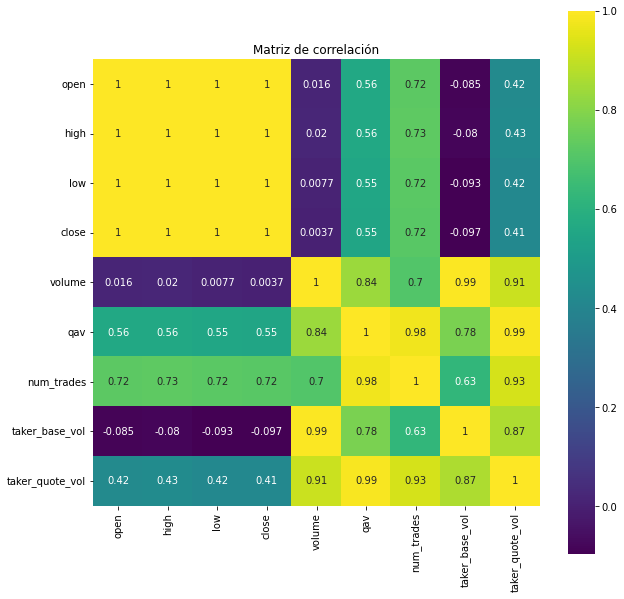

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure (figsize=(10,10))
ax= sns.heatmap(correlation, vmax=1, square= True, annot= True, cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

### Asimetría: skew()

Puede calcular el sesgo de cada atributo utilizando la función skew(). El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [133]:
df.skew()

open               0.719
high               0.720
low                0.715
close              0.713
volume            -0.144
qav               -0.537
num_trades        -0.366
taker_base_vol     0.069
taker_quote_vol   -0.608
dtype: float64

## Análisis de la distribución

### The QQ Plot

In [134]:
import scipy.stats

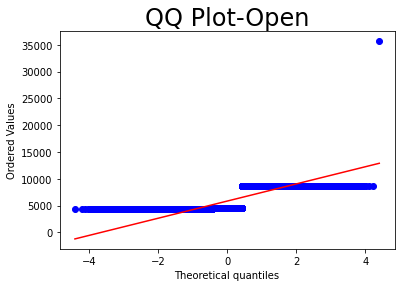

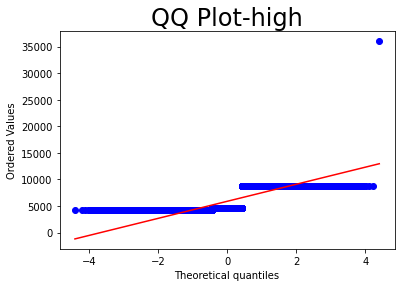

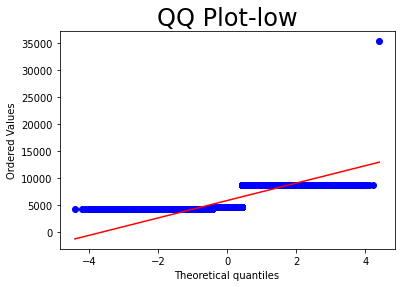

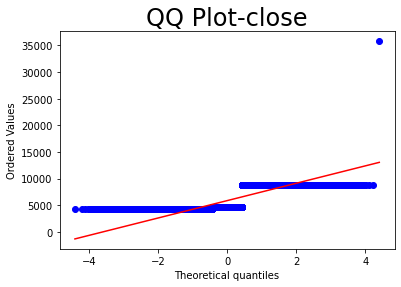

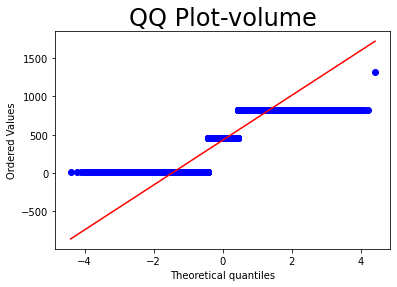

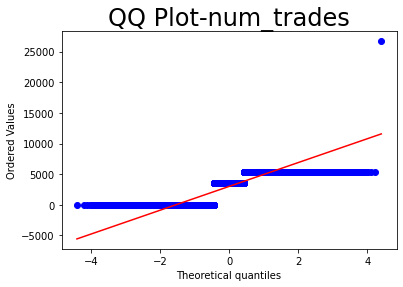

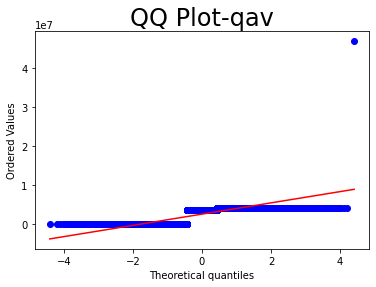

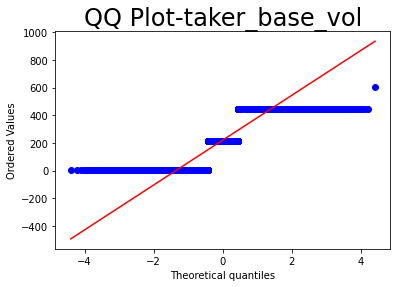

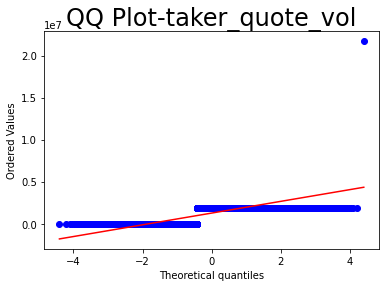

In [135]:
scipy.stats.probplot(df.open, plot =  plt)
plt.title("QQ Plot-Open", size = 24)
plt.show()

scipy.stats.probplot(df.high, plot =  plt)
plt.title("QQ Plot-high", size = 24)
plt.show()

scipy.stats.probplot(df.low, plot =  plt)
plt.title("QQ Plot-low", size = 24)
plt.show()

scipy.stats.probplot(df.close, plot =  plt)
plt.title("QQ Plot-close", size = 24)
plt.show()

scipy.stats.probplot(df.volume, plot =  plt)
plt.title("QQ Plot-volume", size = 24)
plt.show()

scipy.stats.probplot(df.num_trades, plot =  plt)
plt.title("QQ Plot-num_trades", size = 24)
plt.show()

scipy.stats.probplot(df.qav, plot =  plt)
plt.title("QQ Plot-qav", size = 24)
plt.show()

scipy.stats.probplot(df.taker_base_vol, plot =  plt)
plt.title("QQ Plot-taker_base_vol", size = 24)
plt.show()

scipy.stats.probplot(df.taker_quote_vol, plot =  plt)
plt.title("QQ Plot-taker_quote_vol", size = 24)
plt.show()


## Matriz de dispersión

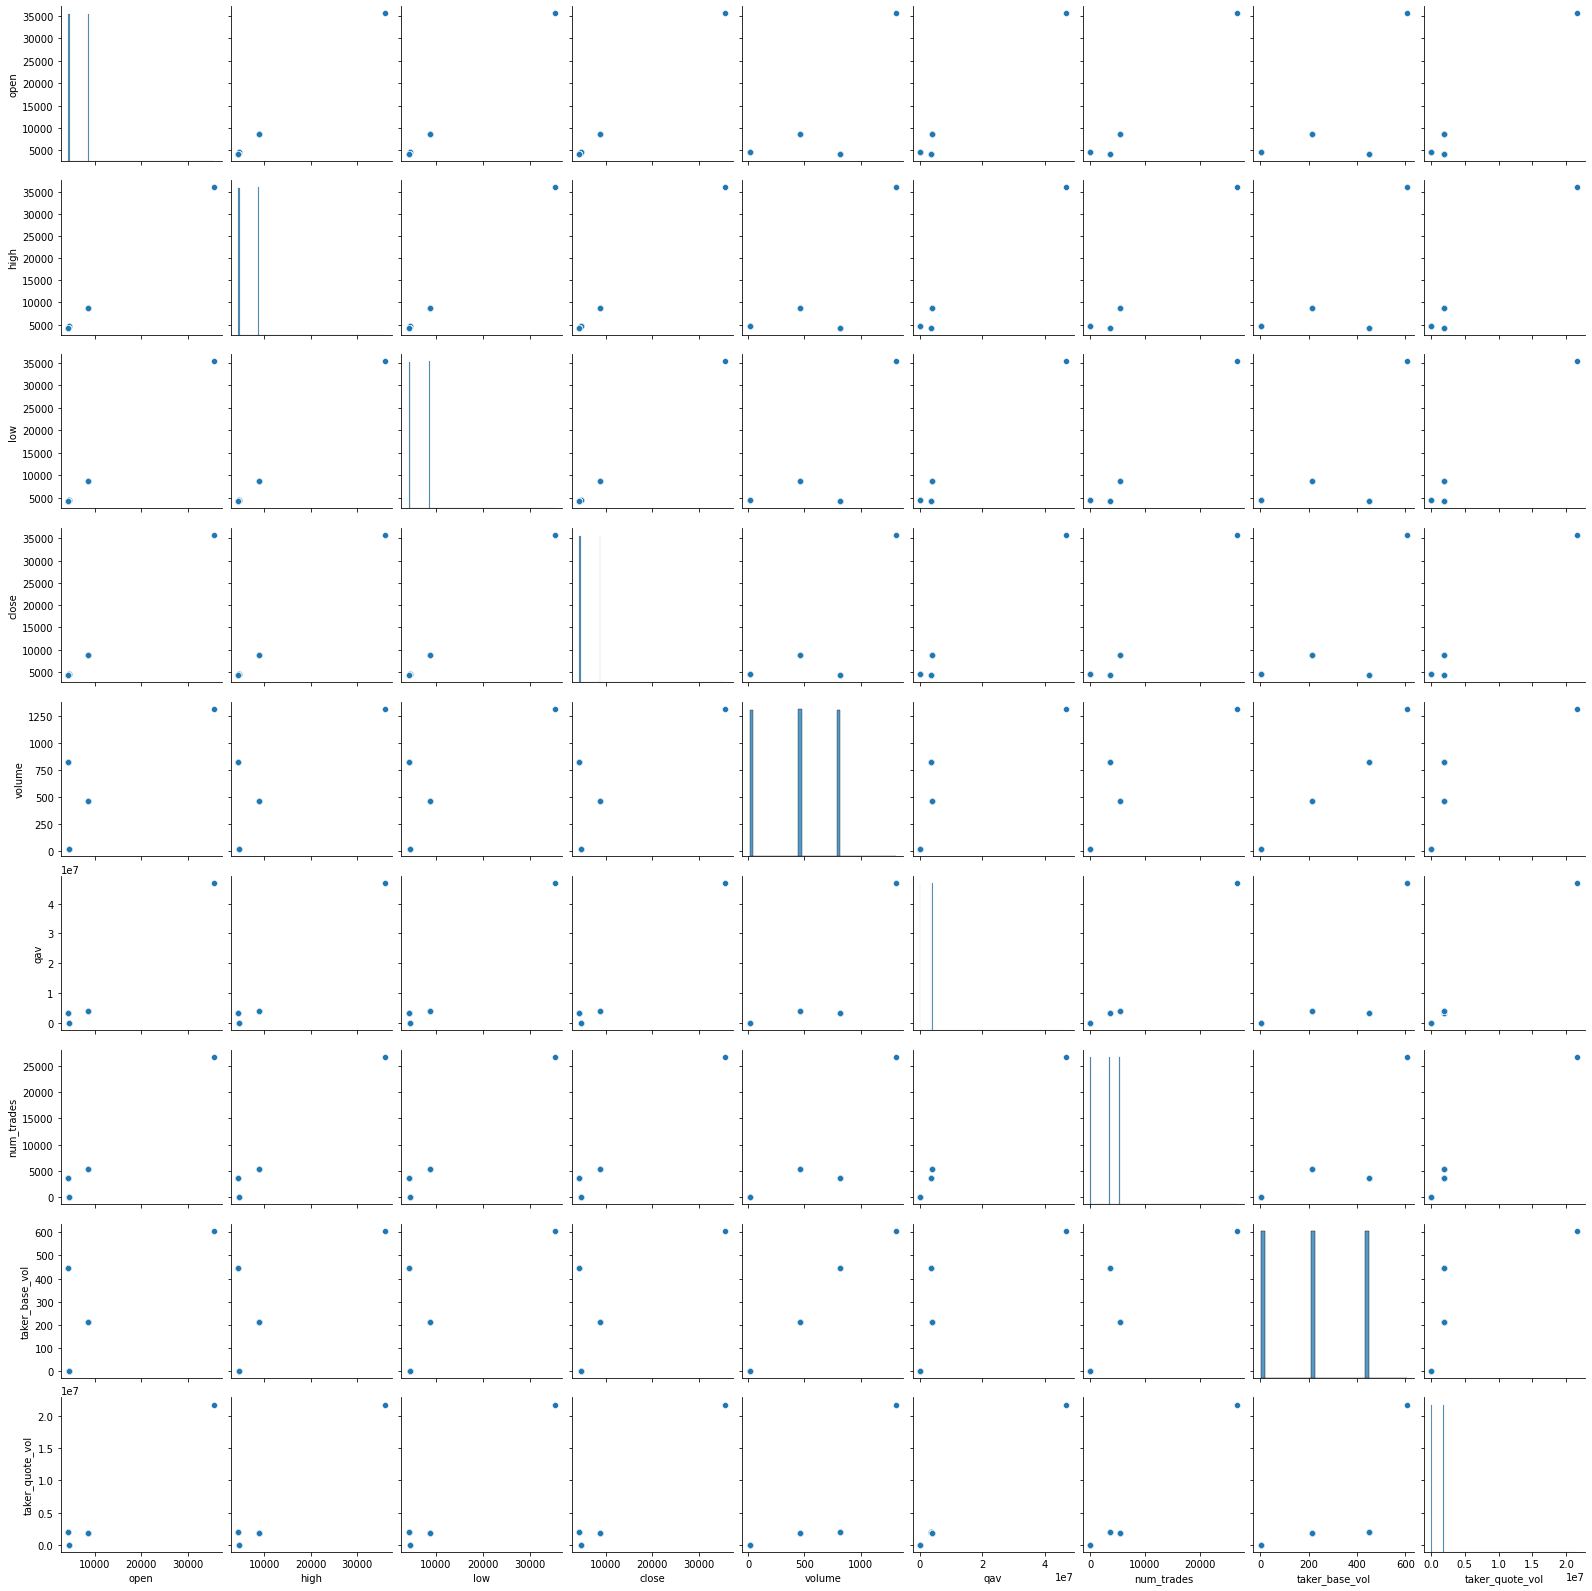

In [136]:
%matplotlib inline
# Correlatioin matrix Seaborn
sns.pairplot(df)

# Representación gráfica del análisis histórico de datos del BTC-USDT entre el 18-08-2017 y el 31-07-2022


---

## Visualización de los datos

## Visualización de los datos

Visualización de los precios Open, Hight, Low, y Close

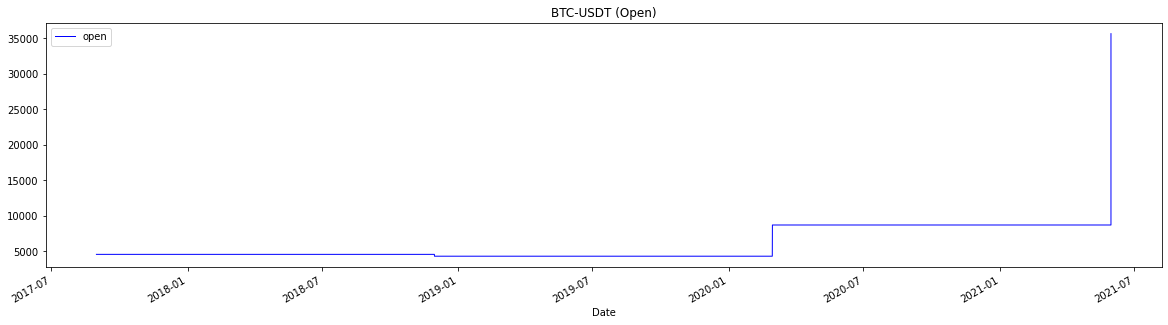

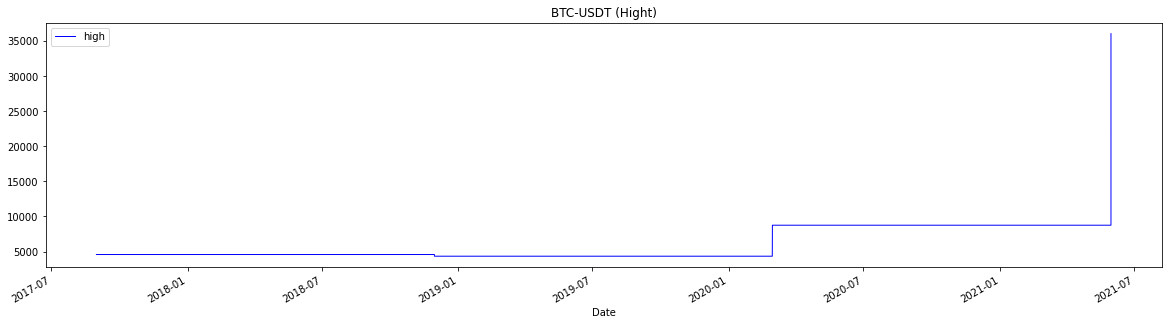

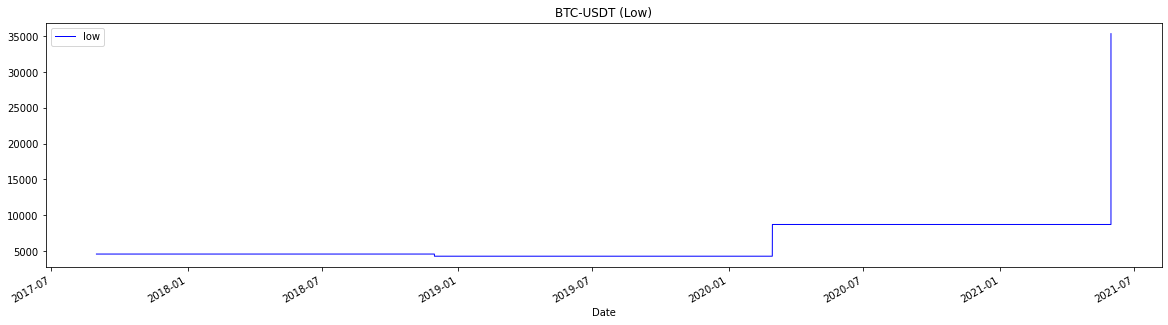

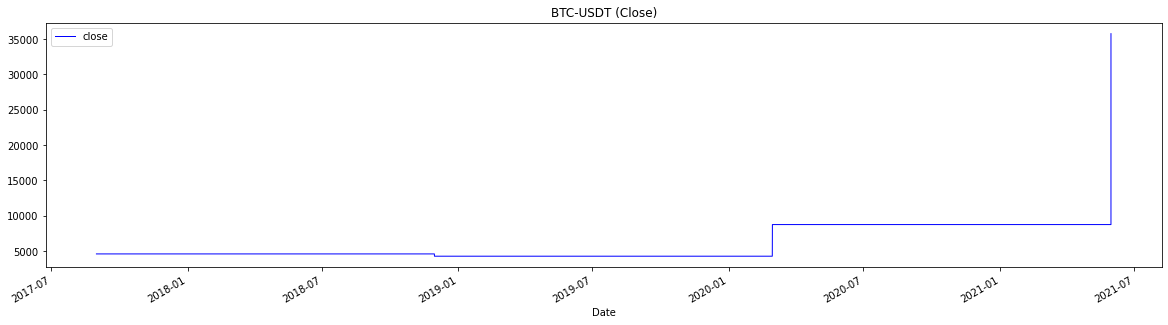

In [137]:
df.plot.line(title='BTC-USDT (Open)',y='open',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Hight)',y='high',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Low)',y='low',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Close)',y='close',figsize=(20,5),lw=1, color="blue")

Visualización del qav

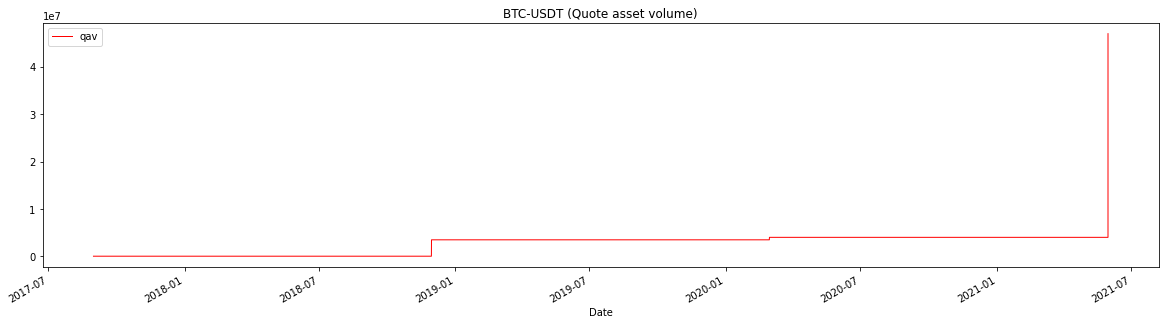

In [138]:
df.plot.line(title='BTC-USDT (Quote asset volume)',y='qav',figsize=(20,5),lw=1, color="red")

Visualización del número de transacciones (num_trades)


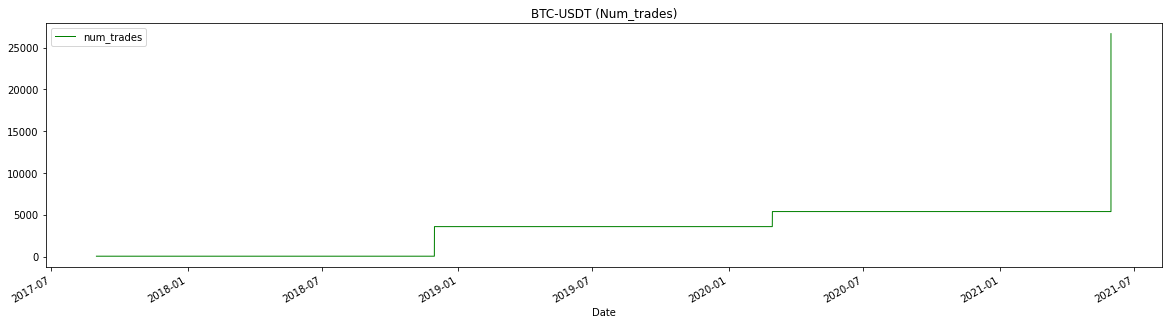

In [139]:
df.plot.line(title='BTC-USDT (Num_trades)',y='num_trades',figsize=(20,5),lw=1, color="green")

Visualización del número de transacciones (taker_base_vol)

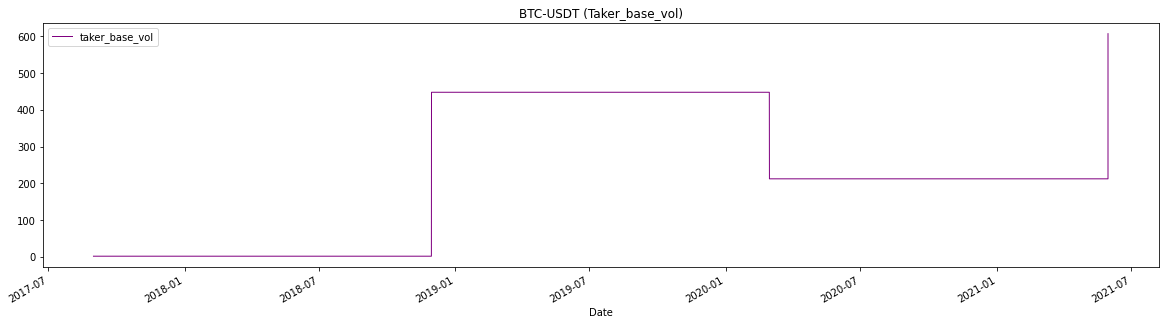

In [140]:
df.plot.line(title='BTC-USDT (Taker_base_vol)',y='taker_base_vol',figsize=(20,5),lw=1, color="purple")

Visualización del número de transacciones (taker_quote_vol)

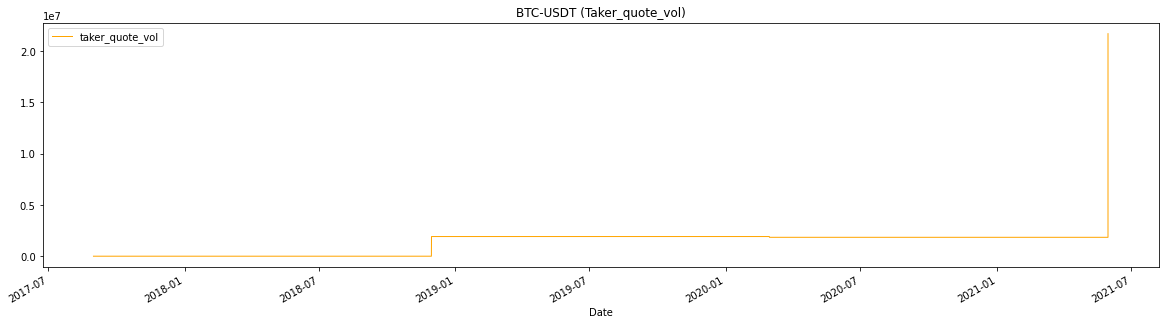

In [141]:
df.plot.line(title='BTC-USDT (Taker_quote_vol)',y='taker_quote_vol',figsize=(20,5),lw=1, color="orange")

# Análisis de la estacionaridad test Dickey-Fuller

## Importar librerias

In [142]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt 


Dickey-Fuller de Open


In [ ]:
sts.adfuller(df.open)

(1.2742271961909133,
 0.9964606606653557,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 1508186.1065177473)


Dickey-Fuller de High


In [ ]:
sts.adfuller(df.high)

(1.2760835228342484,
 0.9964716104852026,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 1511053.724795774)

Dickey-Fuller de Low


In [ ]:
sts.adfuller(df.low)

(1.2698417523372663,
 0.996434622329575,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 1505672.7236466545)

Dickey-Fuller de Close


In [ ]:
sts.adfuller(df.close)

(1.269644552409154,
 0.9964334458225586,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 1509254.0068433734)

Dickey-Fuller de Volumen


In [ ]:
sts.adfuller(df.volume)

(-1.1085113512074507,
 0.7116657685064136,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 692606.7609196815)

Dickey-Fuller de QAV


In [ ]:
sts.adfuller(df.qav)

(0.7408897840816075,
 0.9906195468444342,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 3442486.2699243147)

Dickey-Fuller de Num_trades


In [ ]:
sts.adfuller(df.num_trades)

(0.8574235568999016,
 0.9925087603923898,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 1447409.81234632)

Dickey-Fuller de Taker_base_vol


In [ ]:
sts.adfuller(df.taker_base_vol)

(-1.3233889584697236,
 0.6184050746319816,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 522576.09775836894)

Dickey-Fuller de Taker_quote_vol


In [ ]:
sts.adfuller(df.taker_quote_vol)

(0.5223398606952544,
 0.9855365127314615,
 0,
 131424,
 {'1%': -3.4303997582460477,
  '5%': -2.8615619924231397,
  '10%': -2.5667817057871742},
 3240425.9444227056)

# Análisis de la estacionalidad

## Importar librerias

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Evaluación de la estacionalidad del Open de forma aditiva y de forma multiplicativa

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['open'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

ValueError: ignored

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['open'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Quote asset volume (QAV)

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['qav'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['qav'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Número de trades (num_trades)

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['num_trades'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['num_trades'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Taker buy base asset volume (taker_base_vol)

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_base_vol'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_base_vol'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Taker buy quote asset volume (taker_quote_vol)

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_quote_vol'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_quote_vol'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()